In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('Vehicles.csv')

C:\Users\user01\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [3]:
#Choose features that will effect the target variables
select_columns = ['make', 'model', 'year', 'displ', 'cylinders', 'trany', 'drive', 'VClass','fuelType','barrels08', 'city08', 'highway08', 'comb08', 'co2TailpipeGpm', 'fuelCost08']
vehicles = df[select_columns][df.year <= 2016].drop_duplicates().dropna()
vehicles = vehicles.sort_values(['make', 'model', 'year'])

In [4]:
#Renaming the column so it will more easy to understand
vehicles.columns = ['Make', 'Model', 'Year', 'Engine Displacement', 'Cyclinders', 'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type', 'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG', 'CO2 Emission Grams/Mile', 'Fuels Cost/Year']

In [5]:
vehicles.info()
#from below tables we doesn't need to do data cleaning beacuse all columns had non-null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35095 entries, 19316 to 29609
Data columns (total 15 columns):
Make                       35095 non-null object
Model                      35095 non-null object
Year                       35095 non-null int64
Engine Displacement        35095 non-null float64
Cyclinders                 35095 non-null float64
Transmission               35095 non-null object
Drivetrain                 35095 non-null object
Vehicle Class              35095 non-null object
Fuel Type                  35095 non-null object
Fuel Barrels/Year          35095 non-null float64
City MPG                   35095 non-null int64
Highway MPG                35095 non-null int64
Combined MPG               35095 non-null int64
CO2 Emission Grams/Mile    35095 non-null float64
Fuels Cost/Year            35095 non-null int64
dtypes: float64(4), int64(5), object(6)
memory usage: 4.3+ MB


In [6]:
#Knows the features, the uniqueness(how many differences things) in the features, and the data types of the features
def uniqueness_in_column(dataframe):
    for column in dataframe:
        print("{} | {} | {}".format(dataframe[column].name, len(dataframe[column].unique()), dataframe[column].dtype))

In [7]:
uniqueness_in_column(vehicles)
#we have some numerical columns(int64 and float64) and categorical column(object)

Make | 126 | object
Model | 3490 | object
Year | 33 | int64
Engine Displacement | 65 | float64
Cyclinders | 9 | float64
Transmission | 44 | object
Drivetrain | 7 | object
Vehicle Class | 34 | object
Fuel Type | 13 | object
Fuel Barrels/Year | 116 | float64
City MPG | 48 | int64
Highway MPG | 49 | int64
Combined MPG | 46 | int64
CO2 Emission Grams/Mile | 550 | float64
Fuels Cost/Year | 55 | int64


In [8]:
vehicles['Transmission'].unique()

array(['Automatic 3-spd', 'Automatic 4-spd', 'Manual 5-spd',
       'Automatic (S5)', 'Manual 6-spd', 'Automatic 5-spd', 'Auto(AM8)',
       'Auto(AV-S7)', 'Automatic (S6)', 'Automatic (S9)',
       'Automatic (S4)', 'Automatic (S7)', 'Auto(AM7)', 'Auto(AM-S8)',
       'Auto(AM6)', 'Automatic 6-spd', 'Manual 4-spd', 'Automatic (S8)',
       'Auto(AM-S6)', 'Automatic (variable gear ratios)',
       'Automatic (AV)', 'Auto(AV-S8)', 'Auto(AM-S7)', 'Automatic (AM6)',
       'Automatic 8-spd', 'Auto(A1)', 'Automatic (A1)', 'Automatic (A6)',
       'Auto(AV-S6)', 'Manual 3-spd', 'Manual 7-spd', 'Manual(M7)',
       'Auto (AV)', 'Automatic 9-spd', 'Automatic 6spd', 'Auto(L4)',
       'Auto(L3)', 'Auto (AV-S6)', 'Auto (AV-S8)', 'Automatic (AV-S6)',
       'Automatic 7-spd', 'Manual 5 spd', 'Auto(AM5)', 'Automatic (AM5)'],
      dtype=object)

In [9]:
AUTOMATIC = "Automatic"
MANUAL = "Manual"
vehicles.loc[vehicles['Transmission'].str.startswith('A'), 'Transmission Type'] = AUTOMATIC
vehicles.loc[vehicles['Transmission'].str.startswith('M'), 'Transmission Type'] = MANUAL

In [10]:
small = ['Compact Cars', 'Subcompact Cars', 'Two Seaters', 'Minicompact Cars']
midsize = ['Midsize Cars']
large = ['Large Cars']

vehicles.loc[vehicles['Vehicle Class'].isin(small), 'Vehicle Category'] = 'Small Cars'
vehicles.loc[vehicles['Vehicle Class'].isin(midsize), 'Vehicle Category'] = 'Midsize Cars'
vehicles.loc[vehicles['Vehicle Class'].isin(large), 'Vehicle Category'] = 'Large Cars'
vehicles.loc[vehicles['Vehicle Class'].str.contains('Station'), 'Vehicle Category'] = 'Station Wagon'
vehicles.loc[vehicles['Vehicle Class'].str.contains('Truck'), 'Vehicle Category'] = 'Pickup Truck'
vehicles.loc[vehicles['Vehicle Class'].str.contains('Special Purpose'), 'Vehicle Category'] = 'Special Purpose'
vehicles.loc[vehicles['Vehicle Class'].str.contains('Sport Utility'), 'Vehicle Category'] = 'Sport Utility'
vehicles.loc[vehicles['Vehicle Class'].str.contains('Van'), 'Vehicle Category'] = 'Van & Minivans'

In [11]:
#Check how many suburban model in there
vehicles['Model'].str.contains('Suburban').sum()

193

In [12]:
vehicles['Model Type'] = (vehicles['Make'] + " " + vehicles['Model'].str.split().str.get(0))

In [13]:
vehicles['Fuel Type'].unique()

array(['Regular', 'Premium', 'Diesel', 'Premium and Electricity',
       'Premium or E85', 'Premium Gas or Electricity', 'Gasoline or E85',
       'Gasoline or natural gas', 'CNG', 'Regular Gas or Electricity',
       'Midgrade', 'Regular Gas and Electricity', 'Gasoline or propane'],
      dtype=object)

In [14]:
vehicles['Gas'] = 0
vehicles['Ethanol'] = 0
vehicles['Electric'] = 0
vehicles['Propane'] = 0
vehicles['Natural Gas'] = 0

vehicles.loc[vehicles['Fuel Type'].str.contains('Regular|Gasoline|Midgrade|Premium|Diesel'),'Gas'] = 1
vehicles.loc[vehicles['Fuel Type'].str.contains('E85'),'Ethanol'] = 1
vehicles.loc[vehicles['Fuel Type'].str.contains('Electricity'),'Electric'] = 1
vehicles.loc[vehicles['Fuel Type'].str.contains('propane'), 'Propane'] = 1
vehicles.loc[vehicles['Fuel Type'].str.contains('natural|CNG'), 'Natural Gas'] = 1

In [15]:
vehicles['Gas'].sum()

35035

In [16]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35095 entries, 19316 to 29609
Data columns (total 23 columns):
Make                       35095 non-null object
Model                      35095 non-null object
Year                       35095 non-null int64
Engine Displacement        35095 non-null float64
Cyclinders                 35095 non-null float64
Transmission               35095 non-null object
Drivetrain                 35095 non-null object
Vehicle Class              35095 non-null object
Fuel Type                  35095 non-null object
Fuel Barrels/Year          35095 non-null float64
City MPG                   35095 non-null int64
Highway MPG                35095 non-null int64
Combined MPG               35095 non-null int64
CO2 Emission Grams/Mile    35095 non-null float64
Fuels Cost/Year            35095 non-null int64
Transmission Type          35095 non-null object
Vehicle Category           34725 non-null object
Model Type                 35095 non-null object
Gas   

In [17]:
#Assemble the types of gas in the 'Fuel Type' column into 'Gas Types' which has category of Regular|Gasoline, Midgrade, Premium, Diesel, Natural
vehicles.loc[vehicles['Fuel Type'].str.contains('Regular|Gasoline'), 'Gas Type'] = 'Regular'
vehicles.loc[vehicles['Fuel Type'].str.contains('Midgrade'), 'Gas Type'] = 'Midgrade'
vehicles.loc[vehicles['Fuel Type'].str.contains('Premium'), 'Gas Type'] = 'Premium'
vehicles.loc[vehicles['Fuel Type'].str.contains('Diesel'), 'Gas Type'] = 'Diesel'
vehicles.loc[vehicles['Fuel Type'].str.contains('Natural'), 'Gas Type'] = 'Natural'

In [18]:
#Creating categories for continuous variables
#Creating quintiles for 'Combined MPG'. Create a new column 'Fuel Efficiency' which has 5 categories.
efficiency_categories = ['Very Low Efficieny','Low Efficieny', 'Moderate Efficiency', 'High Efficiency', 'Very High Efficiency']
vehicles['Fuel Efficiency'] = pd.qcut(vehicles['Combined MPG'], 5, efficiency_categories)

#Creating quintiles for 'Engine Displacement'. Create a new column 'Engine Size' which has 5 categories.
engine_categories = ['very Small Engine', 'Small Engine', 'Moderate engine', 'Large Engine','Very Large Engine']
vehicles['Engine Size'] = pd.qcut(vehicles['Engine Displacement'],5, engine_categories)

#Creating quintiles for 'CO2 Emission Grams/Mile'. Create a new column 'Emissions' which has 5 categories.
emission_categories = ['Very Low Emissions', 'Low Emissions', 'Moderate Emissions','High Emissions','Very High Emissions']
vehicles['Emissions'] = pd.qcut(vehicles['CO2 Emission Grams/Mile'],5,emission_categories)

#Creating quintiles for 'Fuels Cost/Year'. Create a new column 'Fuel Cost' which has 5 categories.
fuelcost_categories = ['Very low Fuel Cost','Low Fuel Cost', 'Moderate Fuel Cost','High Fuel Cost','Very High Fuel Cost']
vehicles['Fuel Cost'] = pd.qcut(vehicles['Fuels Cost/Year'], 5, fuelcost_categories)

In [19]:
#Clustering 
#Cluster the columns which has numeric values
cluster_columns = ['Engine Displacement', 'Cyclinders', 'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG', 'CO2 Emission Grams/Mile', 'Fuels Cost/Year']

In [20]:
#Scale the features
#Use Scikit-learn MaxAbsScaler(divide each value by the max absolute value for that feature).
#Convert the data between 0 and 1(it can convert to -1 and 1 but in our data, there are no negatives)
#It will preserve the distribution in the data

from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler()
vehicle_clusters = scaler.fit_transform(vehicles[cluster_columns])
vehicle_clusters = pd.DataFrame(vehicle_clusters, columns=cluster_columns)

In [21]:
#Clustering original dataset to k-means cluster
#Define a function for the cluster

from sklearn.cluster import KMeans

def kmeans_cluster(df, n_clusters=2):
    model = KMeans(n_clusters=n_clusters,random_state=1)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

In [22]:
#Count the number of vehicles that fall in each cluster and calculate the cluster means for each feature
#Merge the counts and means into a single dataframe
#Define a function for the 

def summarize_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster','Count']
    cluster_means = results.groupby(['Cluster'],as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    return cluster_summary

In [23]:
cluster_results = kmeans_cluster(vehicle_clusters, 8)
cluster_summary = summarize_clustering(cluster_results)

In [24]:
cluster_summary

,Cluster,Count,Engine Displacement,Cyclinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuels Cost/Year
0,0,6334,0.241518,0.254243,0.281230,0.383366,0.487341,0.447303,0.281191,0.240410
1,1,2912,0.595553,0.500215,0.395664,0.262860,0.360903,0.315677,0.400217,0.364192
2,2,3999,0.631932,0.501500,0.495338,0.218378,0.281825,0.255475,0.495517,0.422733
3,3,5838,0.267466,0.253950,0.346015,0.314615,0.392238,0.363536,0.345953,0.298589
4,4,7704,0.382627,0.374854,0.353653,0.297454,0.405367,0.355896,0.353625,0.314951
5,5,1826,0.200601,0.244660,0.215546,0.518356,0.616882,0.587946,0.216954,0.183282
6,6,4766,0.446931,0.373387,0.437697,0.249606,0.310320,0.287299,0.437672,0.371041
7,7,1716,0.682005,0.570950,0.601364,0.178472,0.234963,0.210290,0.601190,0.544153


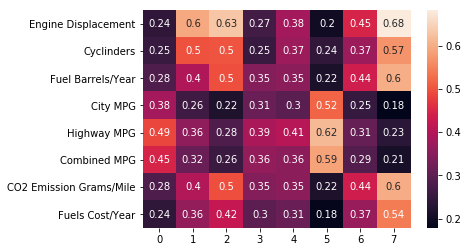

In [25]:
sns.heatmap(cluster_summary[cluster_columns].transpose(),annot=True)

In [26]:
#Cluster 0 and 5 look similar
#Cluster 1,2and 7 look similar
#Cluster 3,4,6 look similar
#Try to cluster it to 4 categories

cluster_results = kmeans_cluster(vehicle_clusters, 4)
cluster_summary = summarize_clustering(cluster_results)

In [27]:
cluster_summary

,Cluster,Count,Engine Displacement,Cyclinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuels Cost/Year
0,0,8195,0.230890,0.251411,0.266962,0.413265,0.515462,0.478114,0.267262,0.227753
1,1,8188,0.513292,0.428325,0.423538,0.253255,0.329058,0.296837,0.425091,0.370426
2,2,13603,0.330854,0.322369,0.352043,0.303940,0.397599,0.357866,0.352017,0.308864
3,3,5109,0.659905,0.527770,0.533567,0.204116,0.266030,0.239825,0.533659,0.465684


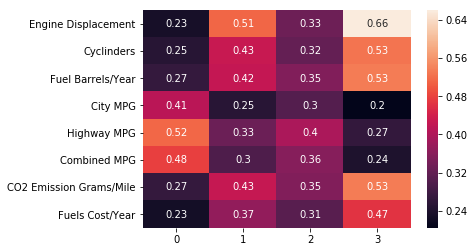

In [28]:
#Draw the heatmap according to the cluster 0-3. Find the difference and similar features between them.
sns.heatmap(cluster_summary[cluster_columns].transpose(),annot=True)

-Cluster 2 is well balanced accross all features
-Cluster 3 has low at 3 MPG fetures but high at other features
-Cluster 1 has high engine displacement but low of other features
-Cluster 0 has high at 3 MPG but low at other features (Contrast to cluster 3)

-Rename cluster 0-3 with suitable name based on the features.
-Cluster 3 vehicles seem to have large engines that consume a lot of fuel, process it inefficiently, produce a lot of     emissions, and cost a lot to fill up. I’m going to label them Large Inefficient.
-Cluster 0 vehicles have small, fuel efficient engines that don’t produce a lot of emissions and are relatively inexpensive to fill up. I’m going to label them Small Very Efficient.
-Cluster 2 vehicles are fairly balanced across every category, so I’m going to label them Midsized Balanced.
-Cluster 1 vehicles have large engines but are more moderately efficient than the vehicles in Cluster 1, so I’m going to label them Large Moderately Efficient.

In [29]:
cluster_results['Cluster Name'] = ''
cluster_results['Cluster Name'][cluster_results['Cluster']==2] = 'Midsized Balanced'
cluster_results['Cluster Name'][cluster_results['Cluster']==3] = 'Large Inefficient'
cluster_results['Cluster Name'][cluster_results['Cluster']==1] = 'Large Moderately Efficient'
cluster_results['Cluster Name'][cluster_results['Cluster']==0] = 'Small Very Efficient'
vehicles = vehicles.reset_index().drop('index', axis=1)
vehicles['Cluster Name'] = cluster_results['Cluster Name']

C:\Users\user01\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user01\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user01\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\user01\Anaconda3\

In this post, we examined several ways to prepare a data set for exploratory analysis. First, we looked at the categorical variables we had and attempted to find opportunities to roll them up into higher-level categories. After that, we converted some of our continuous variables into categorical ones by binning them into quintiles based on how relatively high or low their values were. Finally, we used clustering to efficiently create categories that automatically take multiple fields into consideration. The result of all this preparation is that we now have several columns containing meaningful categories that will provide different perspectives of our data and allow us to acquire as many insights as possible.

Now that we have these meaningful categories, our data set is in really good shape, which means that we can move on to the next phase of our data exploration framework. In the next post, we will cover the first two stages of the Explore Phase and demonstrate various ways to visually aggregate, pivot, and identify relationships between fields in our data.

In [30]:
len(set(vehicles['Cluster Name']))
#Count the frequency of unique unique values in columns
counts_elements = np.unique(vehicles['Cluster Name'], return_counts=True)
print(counts_elements)

(array(['Large Inefficient', 'Large Moderately Efficient',
       'Midsized Balanced', 'Small Very Efficient'], dtype=object), array([ 5109,  8188, 13603,  8195], dtype=int64))


In [31]:
def agg_count(df, group_field):
    grouped = df.groupby(group_field, as_index=False).size()
    
    grouped = pd.DataFrame(grouped).reset_index()
    grouped.columns = [group_field, 'Count']
    return grouped

In [32]:
vehicles_2016 = vehicles[vehicles['Year']==2016]
category_counts = agg_count(vehicles_2016, 'Vehicle Category')

In [33]:
ascending_category_counts = category_counts.sort_values(by='Count', ascending=False)

Text(0.5, 1.0, 'Vehicle Manufactured by Category (2016) \n')

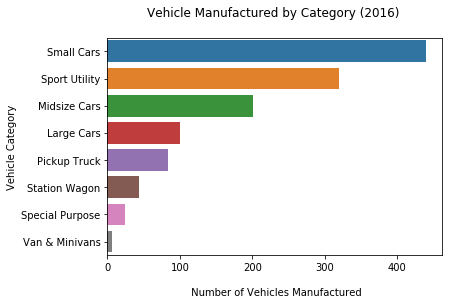

In [34]:
#Visualize the data
ax = sns.barplot(data=ascending_category_counts, x='Count', y='Vehicle Category')
ax.set(xlabel='\n Number of Vehicles Manufactured')
plt.title('Vehicle Manufactured by Category (2016) \n')

In [53]:
vehicles_1985 = vehicles[vehicles['Year']==1985]
category_counts = agg_count(vehicles_1985, 'Vehicle Category')

In [54]:
ascending_category_counts = category_counts.sort_values(by='Count', ascending=False)

In [55]:
ascending_category_counts1

,Vehicle Category,Count
3,Small Cars,520
2,Pickup Truck,316
4,Special Purpose,192
5,Station Wagon,179
1,Midsize Cars,176
6,Van & Minivans,155
0,Large Cars,43


Text(0.5, 1.0, 'Vehicle Manufactured by Category (1985) \n')

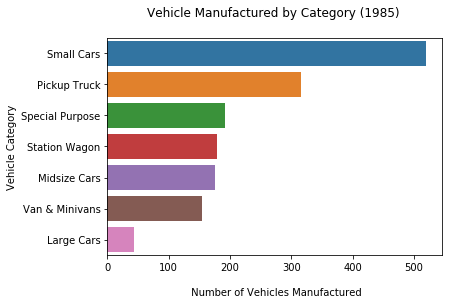

In [56]:
ax = sns.barplot(data=ascending_category_counts1, x='Count', y='Vehicle Category')
ax.set(xlabel='\n Number of Vehicles Manufactured')
plt.title('Vehicle Manufactured by Category (1985) \n')

Text(0.5, 1.0, 'Vehicle Manufactured by Class (2016) \n')

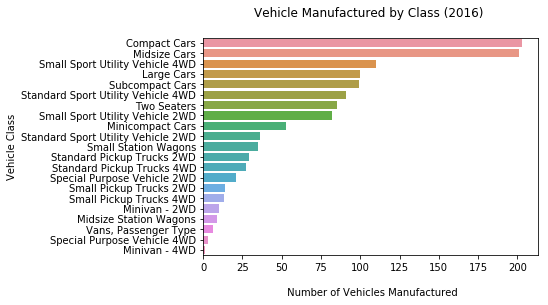

In [60]:
class_counts = agg_count(vehicles_2016, 'Vehicle Class')
ascending_class_counts = class_counts.sort_values(by='Count', ascending= False)
ax = sns.barplot(data = ascending_class_counts, x='Count', y='Vehicle Class')
ax.set(xlabel='\n Number of Vehicles Manufactured')
plt.title("Vehicle Manufactured by Class (2016) \n")

Text(0.5, 1.0, 'Vehicles Manufactured by Make (2016) \n')

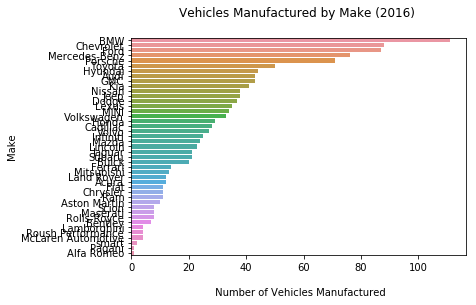

In [62]:
make_counts = agg_count(vehicles_2016, 'Make')
ascending_make_counts = make_counts.sort_values(by='Count', ascending = False)

ax = sns.barplot(data = ascending_make_counts, x='Count', y='Make')
ax.set(xlabel = '\n Number of Vehicles Manufactured')
plt.title('Vehicles Manufactured by Make (2016) \n')

In [66]:
vehicles_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1228 entries, 45 to 35094
Data columns (total 29 columns):
Make                       1228 non-null object
Model                      1228 non-null object
Year                       1228 non-null int64
Engine Displacement        1228 non-null float64
Cyclinders                 1228 non-null float64
Transmission               1228 non-null object
Drivetrain                 1228 non-null object
Vehicle Class              1228 non-null object
Fuel Type                  1228 non-null object
Fuel Barrels/Year          1228 non-null float64
City MPG                   1228 non-null int64
Highway MPG                1228 non-null int64
Combined MPG               1228 non-null int64
CO2 Emission Grams/Mile    1228 non-null float64
Fuels Cost/Year            1228 non-null int64
Transmission Type          1228 non-null object
Vehicle Category           1217 non-null object
Model Type                 1228 non-null object
Gas                        1

Text(0.5, 1.0, 'Very Fuel Efficient Vehicles by Make \n')

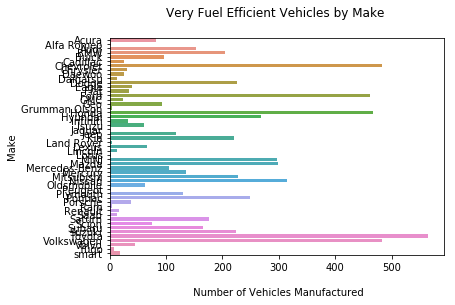

In [68]:
very_efficient = vehicles[vehicles['Fuel Efficiency']=='Very High Efficiency']
make_counts = agg_count(very_efficient, 'Make')
ax = sns.barplot(data=make_counts, x='Count', y='Make')
ax.set(xlabel='\n Number of Vehicles Manufactured')
plt.title('Very Fuel Efficient Vehicles by Make \n')

Averaging, instead of counting the number of records that fall into each group.

In [81]:
def pivot_count(df, rows, columns, calc_field):
    df_pivot = df.pivot_table(values=calc_field, 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    return df_pivot

In [82]:
effic_size_pivot = pivot_count(vehicles_2016,'Fuel Efficiency',
                               'Engine Size','Combined MPG')

In [83]:
effic_size_pivot

Engine Size,very Small Engine,Small Engine,Moderate engine,Large Engine,Very Large Engine
Fuel Efficiency,,,,,
Very Low Efficieny,NaN,NaN,4.0,23.0,72.0
Low Efficieny,NaN,NaN,18.0,49.0,81.0
Moderate Efficiency,NaN,2.0,62.0,76.0,21.0
High Efficiency,33.0,42.0,135.0,67.0,2.0
Very High Efficiency,373.0,97.0,69.0,2.0,NaN


Text(0.5, 1.0, 'Fuel Efficiency vs. Engine Size (2016) \n')

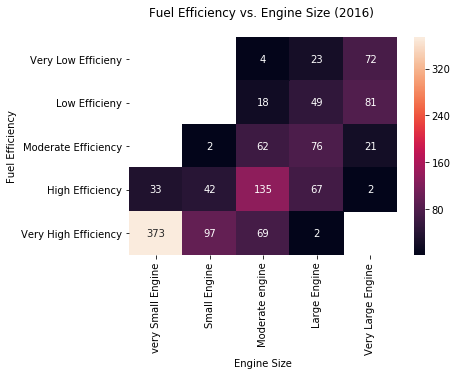

In [84]:
sns.heatmap(effic_size_pivot, annot=True, fmt='g')
ax.set(xlabel='\n Engine Size')
plt.title('Fuel Efficiency vs. Engine Size (2016) \n')

Text(0.5, 1.0, 'Fuel Efficiency vs. Engine Size (1985) \n')

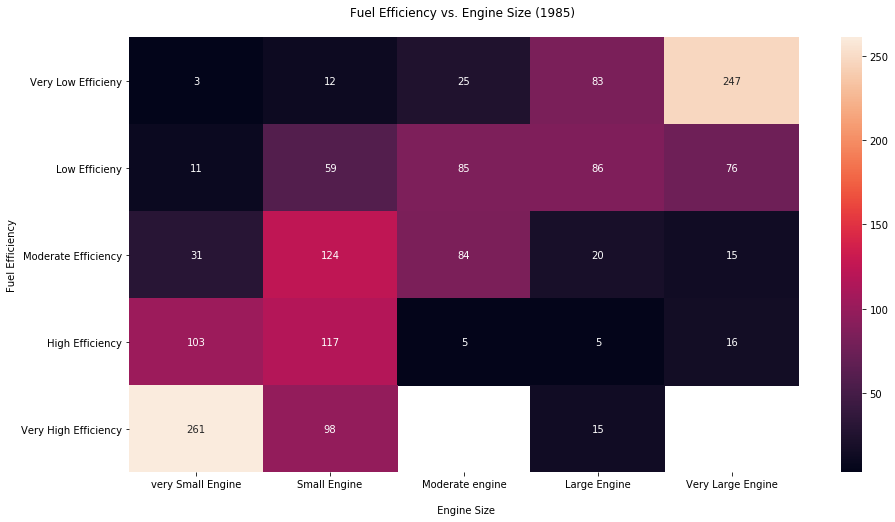

In [86]:
effic_size_pivot = pivot_count(vehicles_1985,'Fuel Efficiency',
                               'Engine Size','Combined MPG')
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(effic_size_pivot, annot=True, fmt='g')
ax.set(xlabel='\n Engine Size')
plt.title('Fuel Efficiency vs. Engine Size (1985) \n')

Text(0.5, 1.0, 'Fuel Efficiency + Engine Size vs. Vehicle Category (2016) \n')

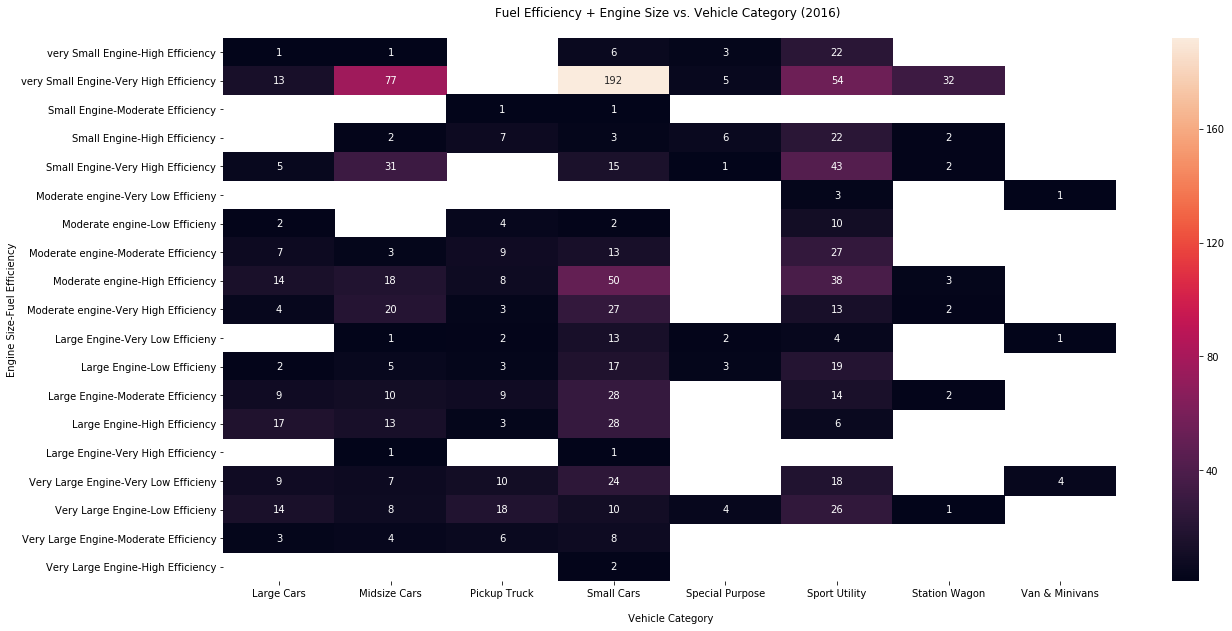

In [88]:
effic_size_category = pivot_count(vehicles_2016,
                                  ['Engine Size','Fuel Efficiency'],
                                  'Vehicle Category','Combined MPG')
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(effic_size_category, annot=True, fmt='g')
ax.set(xlabel='\n Vehicle Category')
plt.title('Fuel Efficiency + Engine Size vs. Vehicle Category (2016) \n')